In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

import pathlib

import time
import os
import sys
import pathlib
import PIL
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.python.keras.engine.sequential import Sequential

In [85]:
data_dir = pathlib.Path('/Users/Vinay/galvanize/capstone_3/dataset')

In [86]:
with_mask = list(data_dir.glob('with_mask/*'))
without_mask = list(data_dir.glob('without_mask/*'))
incorrect_mask = list(data_dir.glob('incorrect_mask/*'))

In [87]:
# LOADER PARAMETERS
# 
batch_size = 32
img_height = 180
img_width = 180

# 80% of images used for training, leaving 20% for validation
# Note: `.image_dataset_from_directory` resizes the images.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training" ,seed=327, image_size=(img_height, img_width), batch_size=batch_size)



Found 2079 files belonging to 3 classes.
Using 1664 files for training.


In [88]:
train_ds.take(1)

<TakeDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [89]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=327,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2079 files belonging to 3 classes.
Using 415 files for validation.


In [90]:
train_class_names = train_ds.class_names

In [92]:
val_class_names = val_ds.class_names

In [121]:
val_class_names

['incorrect_mask', 'with_mask', 'without_mask']

In [93]:
print(train_class_names)
print(val_class_names)


['incorrect_mask', 'with_mask', 'without_mask']
['incorrect_mask', 'with_mask', 'without_mask']


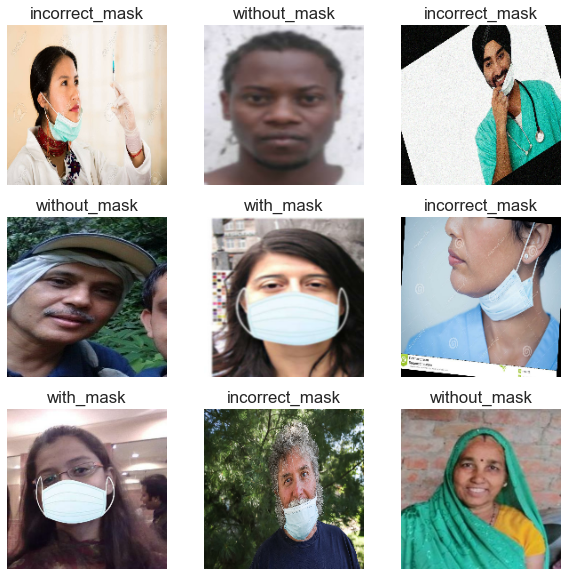

In [289]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [95]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [96]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [97]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [98]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [99]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [101]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
52/52 [==============================] - 80s 1s/step - loss: 0.9482 - accuracy: 0.5671 - val_loss: 0.4479 - val_accuracy: 0.8289
Epoch 2/10
52/52 [==============================] - 45s 863ms/step - loss: 0.3016 - accuracy: 0.9045 - val_loss: 0.2304 - val_accuracy: 0.9277
Epoch 3/10
52/52 [==============================] - 43s 831ms/step - loss: 0.1287 - accuracy: 0.9527 - val_loss: 0.2338 - val_accuracy: 0.9229
Epoch 4/10
52/52 [==============================] - 44s 852ms/step - loss: 0.0689 - accuracy: 0.9792 - val_loss: 0.2615 - val_accuracy: 0.9253
Epoch 5/10
52/52 [==============================] - 43s 821ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.2162 - val_accuracy: 0.9422
Epoch 6/10
52/52 [==============================] - 41s 793ms/step - loss: 0.0282 - accuracy: 0.9918 - val_loss: 0.2154 - val_accuracy: 0.9566
Epoch 7/10
52/52 [==============================] - 41s 793ms/step - loss: 0.0146 - accuracy: 0.9962 - val_loss: 0.2723 - val_accuracy: 0.9470
Ep

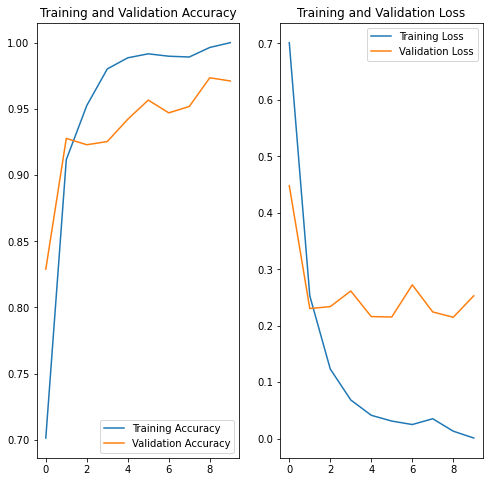

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [103]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

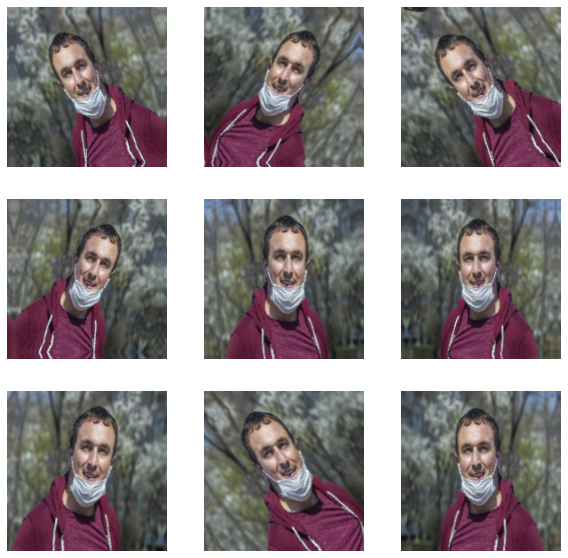

In [104]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [105]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [106]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [107]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [108]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
52/52 [==============================] - 46s 854ms/step - loss: 1.8067 - accuracy: 0.4189 - val_loss: 0.7388 - val_accuracy: 0.6819
Epoch 2/15
52/52 [==============================] - 40s 772ms/step - loss: 0.5710 - accuracy: 0.7697 - val_loss: 0.4437 - val_accuracy: 0.8096
Epoch 3/15
52/52 [==============================] - 41s 794ms/step - loss: 0.4102 - accuracy: 0.8385 - val_loss: 0.3080 - val_accuracy: 0.8843
Epoch 4/15
52/52 [==============================] - 40s 771ms/step - loss: 0.3526 - accuracy: 0.8703 - val_loss: 0.3715 - val_accuracy: 0.8651
Epoch 5/15
52/52 [==============================] - 40s 774ms/step - loss: 0.2864 - accuracy: 0.8918 - val_loss: 0.2597 - val_accuracy: 0.9036
Epoch 6/15
52/52 [==============================] - 41s 786ms/step - loss: 0.2123 - accuracy: 0.9233 - val_loss: 0.1876 - val_accuracy: 0.9398
Epoch 7/15
52/52 [==============================] - 40s 773ms/step - loss: 0.1828 - accuracy: 0.9409 - val_loss: 0.1758 - val_accuracy: 0.9373

In [109]:
score = model.evaluate(val_ds, verbose=1)

13/13 [==============================] - 3s 206ms/step - loss: 0.1521 - accuracy: 0.9566


In [110]:
print('loss score:', score[0])
print('accuracy:', score[1])  

loss score: 0.1520691066980362
accuracy: 0.9566265344619751


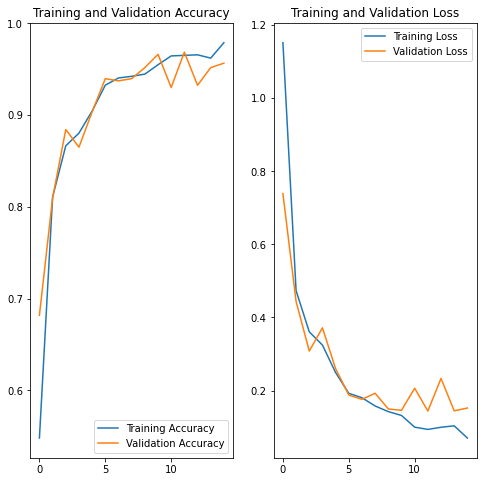

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [112]:
test_url = "https://www.closingthegap.com/wp-content/uploads/2020/04/standardmask.jpg"
test_path = tf.keras.utils.get_file('standardmask', origin=test_url)

img = keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to without_mask with a 84.56 percent confidence.


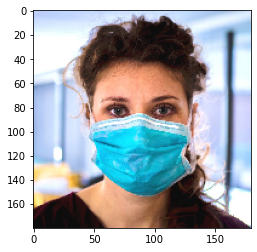

In [113]:
plt.imshow(img)

In [114]:
for images, labels in train_ds:
    print(len(labels),labels)



32 tf.Tensor([0 0 0 0 2 0 2 1 0 0 0 0 1 0 2 2 2 1 0 2 2 2 2 0 0 1 1 2 1 1 2 2], shape=(32,), dtype=int32)
32 tf.Tensor([2 1 1 1 0 2 0 0 2 0 0 2 1 0 1 0 1 1 1 2 0 0 1 2 1 2 1 0 2 2 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([2 0 1 0 2 0 1 1 1 2 1 0 0 0 0 0 2 0 2 1 0 2 0 1 0 1 1 1 2 2 1 2], shape=(32,), dtype=int32)
32 tf.Tensor([0 2 0 2 1 0 2 1 0 1 0 0 2 2 2 2 2 2 0 0 2 1 1 2 2 2 1 2 1 2 0 2], shape=(32,), dtype=int32)
32 tf.Tensor([1 2 2 0 0 2 0 1 1 2 1 0 1 1 1 0 0 2 2 1 0 1 0 0 0 1 0 2 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 2 1 0 0 2 2 1 0 0 2 2 2 2 1 0 0 2 1 0 2 1 2 2 1 2 2 0 2 2 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 2 0 2 2 0 2 1 2 1 2 1 1 0 2 2 2 0 0 0 2 0 2 1 2 0 0 1 2 2 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 0 0 2 1 1 0 0 1 1 2 1 0 2 0 1 2 1 2 2 1 1 1 1 1 2 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 2 2 1 2 2 1 0 0 0 0 1 1 2 2 1 0 0 0 1 1 0 2 1 2 0 0 2 1 2 0 2], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 2 0 2 1 0 0 0 2 0 0 0 1 1 

In [115]:
len(train_ds)


52

In [120]:
train_ds.class_name

AttributeError: 'PrefetchDataset' object has no attribute 'class_name'

In [122]:
y_val = []
for images, labels in val_ds:
    for i in range(len(labels)):
        y_val.append(val_class_names[labels[i]])
len(y_val)

415

In [291]:
x_val = []
for images, labels in train_ds:
    for i in range(len(labels)):
        x_val.append(val_class_names[labels[i]])
len(x_val)

uniquex, countsx = np.unique(x_val, return_counts=True)
dict(zip(uniquex, countsx))

{'incorrect_mask': 572, 'with_mask': 555, 'without_mask': 537}

In [123]:

unique, counts = np.unique(y_val, return_counts=True)
dict(zip(unique, counts))

{'incorrect_mask': 131, 'with_mask': 135, 'without_mask': 149}

In [312]:
x_value_graph = x_val.sort()
y_value_graph = y_val.sort()

None


In [310]:
x_value_graph

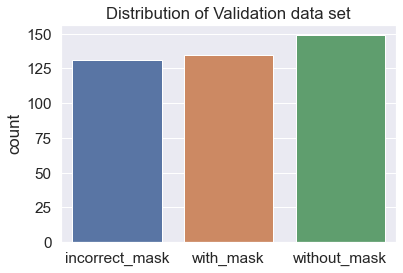

In [307]:
plt.title("Distribution of Validation data set")
sns.countplot(y_val)

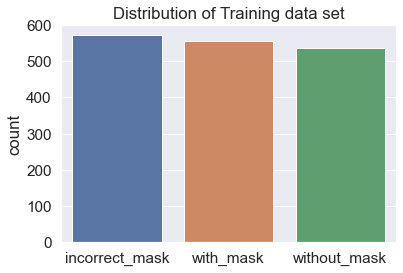

In [315]:
plt.title("Distribution of Training data set")
sns.countplot(x_val)

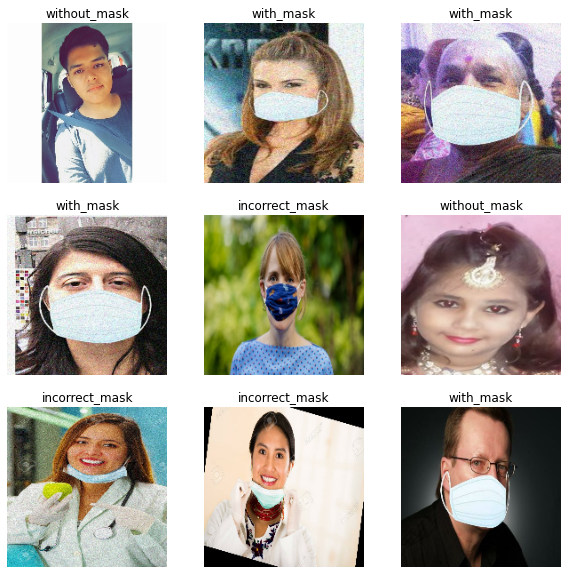

In [125]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(val_class_names[labels[i]])
    plt.axis("off")

In [287]:
class_preds = [] # list of arrays
target = [] # list of tensors
image = [] # list of tensors
class_probs = [] # list of arrays
for images, labels in val_ds:
    class_preds.append(model.predict_classes(images))
    class_probs.append(model.predict(images))
    target.append(labels)
    image.append(images)

In [286]:
len(class_probs)


13

In [128]:
class_preds[:3]


[array([0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1,
        2, 0, 1, 0, 2, 0, 1, 0, 2, 1]),
 array([0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2,
        2, 0, 2, 1, 0, 0, 2, 0, 2, 0]),
 array([1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2,
        2, 1, 1, 0, 2, 0, 1, 0, 0, 1])]

In [129]:
flat_class_preds = []
for sublist in class_preds:
    for item in sublist:
        flat_class_preds.append(item)

In [130]:
target_list = []
for i in target:
    target_list.append(i.numpy())

In [131]:
flat_target = []
for sublist in target_list:
    for item in sublist:
        flat_target.append(item)

In [132]:
probs_flat = []
for sublist in class_probs:
    for item in sublist:
        probs_flat.append(item)

In [133]:
predicts = np.array([])
labels =  np.array([])
for x, y in val_ds:
    predicts = np.concatenate([predicts, model.predict_classes(x)])
    labels = np.concatenate([labels, y.numpy()])

In [135]:
cm = confusion_matrix(y_true=flat_target, y_pred=flat_class_preds)
cm

array([[126,   1,   4],
       [  3, 126,   6],
       [  3,   1, 145]])

In [136]:
report = classification_report(y_true=flat_target, y_pred=flat_class_preds)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       131
           1       0.98      0.93      0.96       135
           2       0.94      0.97      0.95       149

    accuracy                           0.96       415
   macro avg       0.96      0.96      0.96       415
weighted avg       0.96      0.96      0.96       415



Predicted counts

In [137]:
unique, counts = np.unique(flat_class_preds, return_counts=True)
dict(zip(unique, counts))

{0: 132, 1: 128, 2: 155}

target counts

In [138]:
unique, counts = np.unique(flat_target, return_counts=True)
dict(zip(unique, counts))

{0: 131, 1: 135, 2: 149}

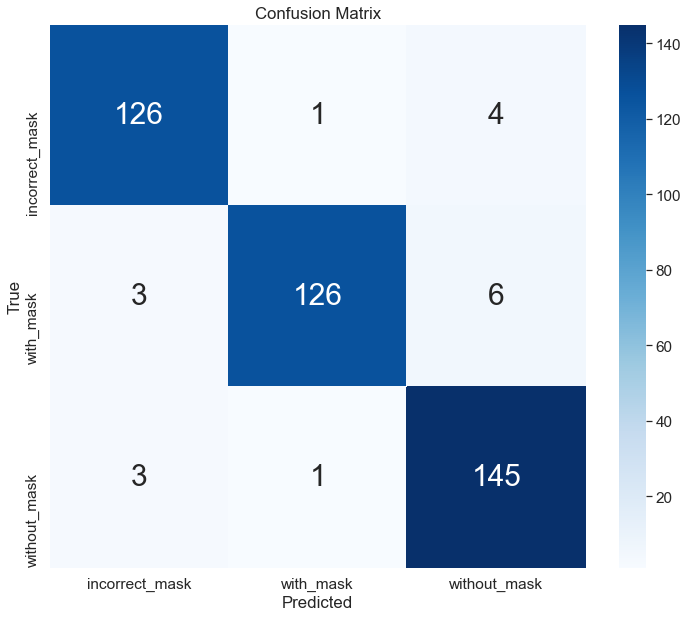

In [324]:
class_names = ['incorrect_mask', 'with_mask', 'without_mask']
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (12,10))
sns.set(font_scale=1.4)#for label size
sns.color_palette("mako", as_cmap=True)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 30}, fmt='g', xticklabels = class_names, yticklabels = class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [150]:
print('Accuracy score: {}'.format(accuracy_score(y_true=flat_target, y_pred=flat_class_preds)))


Accuracy score: 0.9566265060240964


In [151]:
print('Recall score: {}'.format(recall_score(y_true=flat_target, y_pred=flat_class_preds)))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [152]:
print('Precision score: {}'.format(precision_score(y_true=flat_target, y_pred=flat_class_preds)))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [153]:
miss_indices = [index for index, elem in enumerate(flat_target) if elem != flat_class_preds[index]]


In [199]:
miss_indices


[0,
 21,
 52,
 54,
 56,
 82,
 119,
 138,
 144,
 166,
 205,
 215,
 236,
 260,
 310,
 322,
 362,
 375]

In [180]:
len(image[12])

31

In [181]:
image_list_flat = []
for i in image:
    for y in i:
        image_list_flat.append(y)

In [236]:
image_list = []
label_list = []
for image, label in val_ds:
    image_list.append(image)
    label_list.append(label)

In [246]:
label_list[0]

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 1], dtype=int32)>

In [203]:
image_list_flat = []
for i in image_list:
    for y in i:
        image_list_flat.append(y)

In [237]:
label_list_flat = []
for lable in label_list:
    for i in label:
        image_list_flat.append(i)

In [213]:
miss_indices

[0,
 21,
 52,
 54,
 56,
 82,
 119,
 138,
 144,
 166,
 205,
 215,
 236,
 260,
 310,
 322,
 362,
 375]

In [271]:
for i in miss_indices:
flat_class_preds

[0,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,


In [284]:
print(flat_target[0])
print(flat_class_preds[0])
print(probs_flat[0])

2
0
-1.143509


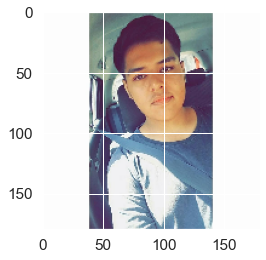

In [272]:
plt.imshow(image_list_flat[0].numpy().astype("uint8"))

In [240]:
label_list_flat

[]

In [275]:
print(flat_target[21])
print(flat_class_preds[21])

0
1


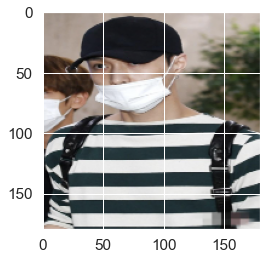

In [216]:
plt.imshow(image_list_flat[21].numpy().astype("uint8"))

In [276]:
print(flat_target[52])
print(flat_class_preds[52])

1
2


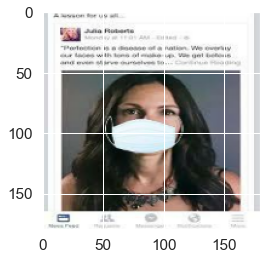

In [219]:
plt.imshow(image_list_flat[52].numpy().astype("uint8"))

In [277]:
print(flat_target[54])
print(flat_class_preds[54])

0
2


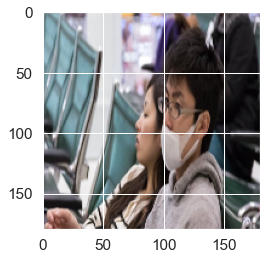

In [220]:
plt.imshow(image_list_flat[54].numpy().astype("uint8"))

In [278]:
print(flat_target[56])
print(flat_class_preds[56])

1
2


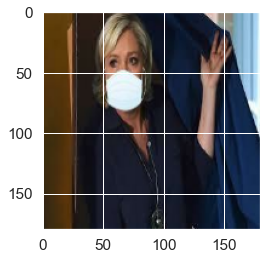

In [221]:
plt.imshow(image_list_flat[56].numpy().astype("uint8"))

In [279]:
print(flat_target[82])
print(flat_class_preds[82])

1
0


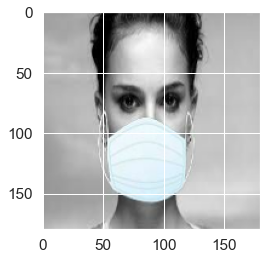

In [222]:
plt.imshow(image_list_flat[82].numpy().astype("uint8"))

In [280]:
print(flat_target[119])
print(flat_class_preds[119])

1
2


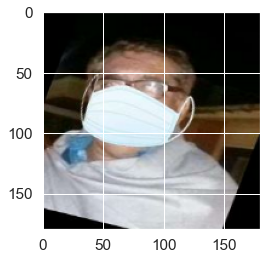

In [223]:
plt.imshow(image_list_flat[119].numpy().astype("uint8"))

In [281]:
print(flat_target[138])
print(flat_class_preds[138])

1
2


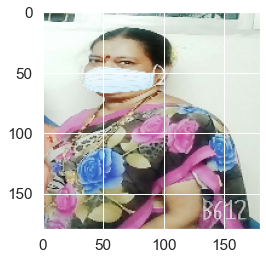

In [224]:
plt.imshow(image_list_flat[138].numpy().astype("uint8"))

In [283]:
print(flat_target[144])
print(flat_class_preds[144])
print(flat_class_probs[144])

0
2


NameError: name 'flat_class_probs' is not defined

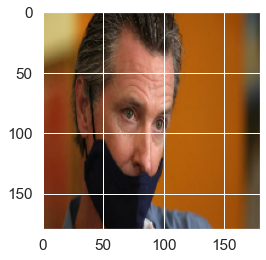

In [225]:
plt.imshow(image_list_flat[144].numpy().astype("uint8"))

In [325]:
print(flat_target[166])
print(flat_class_preds[166])

1
2


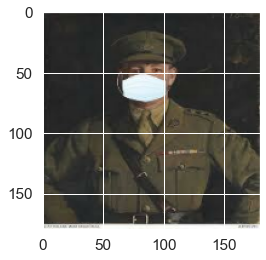

In [226]:
plt.imshow(image_list_flat[166].numpy().astype("uint8"))

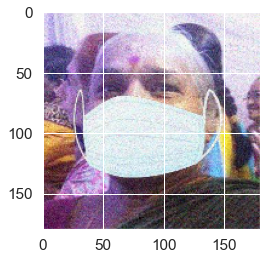

In [228]:
plt.imshow(image_list_flat[205].numpy().astype("uint8"))

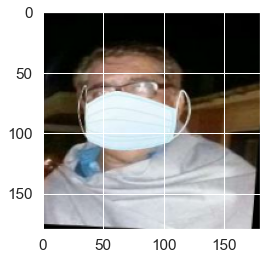

In [229]:
plt.imshow(image_list_flat[215].numpy().astype("uint8"))

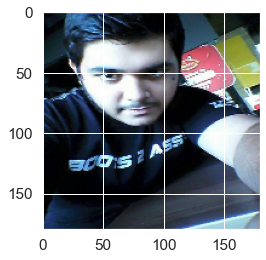

In [230]:
plt.imshow(image_list_flat[236].numpy().astype("uint8"))

In [303]:
print(flat_target[260])
print(flat_class_preds[260])

2
0


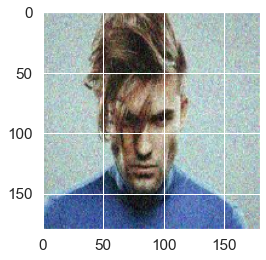

In [231]:
plt.imshow(image_list_flat[260].numpy().astype("uint8"))

In [302]:
print(flat_target[310])
print(flat_class_preds[310])

0
2


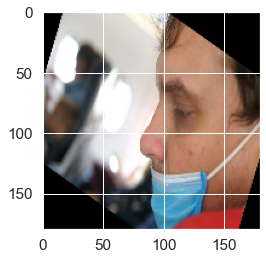

In [232]:
plt.imshow(image_list_flat[310].numpy().astype("uint8"))

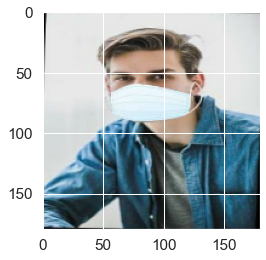

In [233]:
plt.imshow(image_list_flat[322].numpy().astype("uint8"))

In [300]:
print(flat_target[362])
print(flat_class_preds[362])

2
0


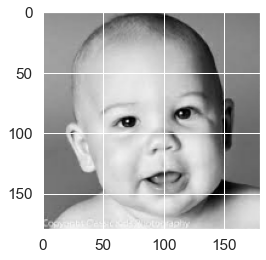

In [234]:
plt.imshow(image_list_flat[362].numpy().astype("uint8"))

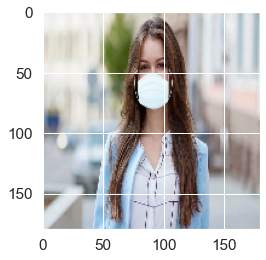

In [235]:
plt.imshow(image_list_flat[375].numpy().astype("uint8"))